<a href="https://colab.research.google.com/github/sravi2210/ADV_Ravi-Sridharan/blob/main/imagenet_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import vgg19
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input


In [31]:
from tensorflow.keras.applications import MobileNetV2

In [32]:
mobile_net = MobileNetV2(weights="imagenet", include_top=True,input_shape=(224, 224, 3))

In [33]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
model = vgg16.VGG16(weights='imagenet',include_top=True, input_shape=(224, 224, 3))

In [34]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model_inception = InceptionV3(weights='imagenet',include_top=True, input_shape=(299, 299, 3))

In [36]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
model_resnet = ResNet50(weights='imagenet', include_top=True,input_shape=(224,224,3))

In [37]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img("/content/Pandas.jpg", target_size=(224, 224))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a fourth dimension (since Keras expects a list of images)
x = np.expand_dims(x, axis=0)

In [38]:
x.shape

(1, 224, 224, 3)

In [40]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img_incep = image.load_img("/content/Pandas.jpg", target_size=(299, 299))

# Convert the image to a numpy array
x_incep = image.img_to_array(img_incep)

# Add a fourth dimension (since Keras expects a list of images)
x_incep = np.expand_dims(x_incep, axis=0)

In [41]:
x_incep.shape

(1, 299, 299, 3)

In [42]:
# Normalize the input image's pixel values to the range used when training the neural network
x = vgg16.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = vgg16.decode_predictions(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


In [43]:
predicted_classes

[[('n02510455', 'giant_panda', 0.84854686),
  ('n02447366', 'badger', 0.058172654),
  ('n04254680', 'soccer_ball', 0.016941272),
  ('n02391049', 'zebra', 0.008403158),
  ('n01855672', 'goose', 0.008160616)]]

In [44]:
# Normalize the input image's pixel values to the range used when training the neural network
x_incep = preprocess_input(x_incep)

# Run the image through the deep neural network to make a prediction
predictions_incep = model_inception.predict(x_incep)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes_incep = vgg16.decode_predictions(predictions_incep)
predicted_classes_incep

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


[[('n02510455', 'giant_panda', 0.9116601),
  ('n04254680', 'soccer_ball', 0.0028213658),
  ('n02509815', 'lesser_panda', 0.0028034146),
  ('n01950731', 'sea_slug', 0.0012042534),
  ('n02488702', 'colobus', 0.0008250726)]]

In [45]:
# Normalize the input image's pixel values to the range used when training the neural network
#x = vgg16.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions = mobile_net.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes_mobile = vgg16.decode_predictions(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [46]:
predicted_classes_mobile

[[('n04418357', 'theater_curtain', 0.4905228),
  ('n04286575', 'spotlight', 0.18864748),
  ('n04209239', 'shower_curtain', 0.021904005),
  ('n02895154', 'breastplate', 0.017260304),
  ('n02782093', 'balloon', 0.009280477)]]

In [47]:
import matplotlib.pyplot as plt


In [49]:
org_img = image.load_img("/content/Pandas.jpg", target_size=(299, 299))

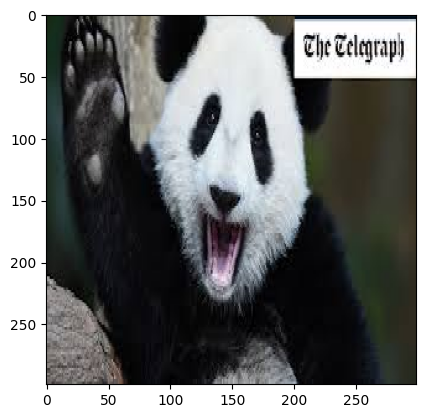

In [50]:
plt.imshow(org_img)

In [51]:
# Run the image through the deep neural network to make a prediction
predictions_resnet = model_resnet.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes_resnet = vgg16.decode_predictions(predictions_resnet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [52]:
predicted_classes_resnet

[[('n02510455', 'giant_panda', 0.7699095),
  ('n02447366', 'badger', 0.02562315),
  ('n02500267', 'indri', 0.011595855),
  ('n02134418', 'sloth_bear', 0.009173509),
  ('n02093647', 'Bedlington_terrier', 0.008011909)]]